In [1]:
1+2

3

In [2]:
!pip install mlxtend

In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
dataset = [
    ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
    ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
    ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]

In [6]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
#converting the dataset into dataframe

In [7]:
#frequent itemset
freq_itemset = apriori(df, min_support=0.5, use_colnames=True)
print('Frequent ItemSet')
print(freq_itemset)

Frequent ItemSet
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Onion, Eggs)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Kidney Beans, Onion, Eggs)


In [10]:
# Generate Association Rules

rules = association_rules(freq_itemset, metric="confidence", min_threshold=1)
print('Association Rules')
print(rules)

Association Rules
             antecedents           consequents  antecedent support  \
0                 (Eggs)        (Kidney Beans)                 0.8   
1                (Onion)                (Eggs)                 0.6   
2                 (Milk)        (Kidney Beans)                 0.6   
3                (Onion)        (Kidney Beans)                 0.6   
4               (Yogurt)        (Kidney Beans)                 0.6   
5  (Kidney Beans, Onion)                (Eggs)                 0.6   
6          (Onion, Eggs)        (Kidney Beans)                 0.6   
7                (Onion)  (Kidney Beans, Eggs)                 0.6   

   consequent support  support  confidence  lift  representativity  leverage  \
0                 1.0      0.8         1.0  1.00               1.0      0.00   
1                 0.8      0.6         1.0  1.25               1.0      0.12   
2                 1.0      0.6         1.0  1.00               1.0      0.00   
3                 1.0      0.6 

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [11]:
print(rules[ ['antecedents', 'consequents', 'support', 'confidence', 'lift' ]   ])

             antecedents           consequents  support  confidence  lift
0                 (Eggs)        (Kidney Beans)      0.8         1.0  1.00
1                (Onion)                (Eggs)      0.6         1.0  1.25
2                 (Milk)        (Kidney Beans)      0.6         1.0  1.00
3                (Onion)        (Kidney Beans)      0.6         1.0  1.00
4               (Yogurt)        (Kidney Beans)      0.6         1.0  1.00
5  (Kidney Beans, Onion)                (Eggs)      0.6         1.0  1.25
6          (Onion, Eggs)        (Kidney Beans)      0.6         1.0  1.00
7                (Onion)  (Kidney Beans, Eggs)      0.6         1.0  1.25


In [ ]:
#lift is a metric for Assoc. Rule X--Y
#lift  = confidence(X-->Y)/ Support(Y)

In [12]:
data = pd.read_csv('/content/drive/MyDrive/MBA_PriyankaMam/groceries.csv')
df = data.copy()
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [13]:
df.shape

(700, 1)

In [14]:
# check for missing values
mv = df.isnull().sum()
print(mv)

Items    0
dtype: int64


In [15]:
# Milk, milk, MIlk, milK  case sensitive
# convert into lower case
df['Items'] = df['Items'].str.lower()

In [18]:
# convert to array for performing one-hot encoding
items = df['Items'].str.split(',').values
type(items)

numpy.ndarray

In [19]:
items.shape

(700,)

In [20]:
items.tolist()

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [21]:
# for one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(items).transform(items)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,...,turkey,uht-milk,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
frequent_itemset = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemset.head()

,support,itemsets
0,0.011429,(baking powder)
1,0.060000,(beef)
2,0.040000,(berries)
3,0.031429,(beverages)
4,0.064286,(bottled beer)


In [23]:
print(frequent_itemset)

      support                                       itemsets
0    0.011429                                (baking powder)
1    0.060000                                         (beef)
2    0.040000                                      (berries)
3    0.031429                                    (beverages)
4    0.064286                                 (bottled beer)
..        ...                                            ...
309  0.012857  (whole milk, tropical fruit, root vegetables)
310  0.010000          (yogurt, whole milk, root vegetables)
311  0.011429                  (yogurt, whole milk, sausage)
312  0.011429                     (yogurt, whole milk, soda)
313  0.012857           (yogurt, whole milk, tropical fruit)

[314 rows x 2 columns]


In [26]:
import matplotlib.pyplot as plt

In [32]:
# Bar plot for frequent itemsets

frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))


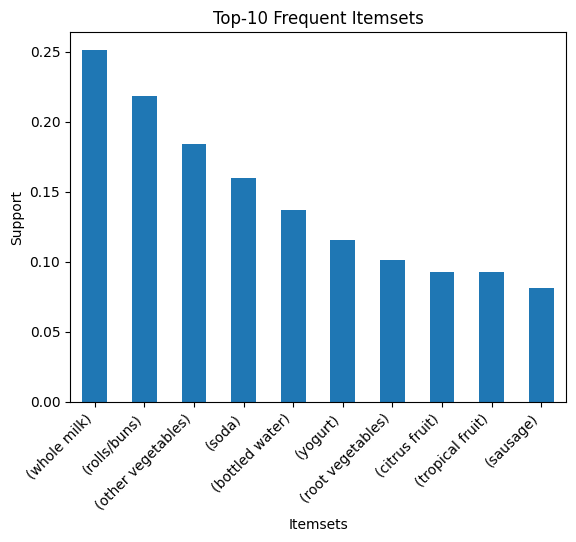

In [35]:
frequent_itemset.sort_values('support', ascending=False).head(10).plot(kind='bar', x='itemsets', y='support', legend=False)

plt.title('Top-10 Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [43]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemset, metric="confidence", min_threshold=0.75)
print(rules)

                       antecedents   consequents  antecedent support  \
0                        (cereals)  (whole milk)            0.011429   
1                 (frozen dessert)  (whole milk)            0.014286   
2  (yogurt, fruit/vegetable juice)  (whole milk)            0.017143   
3          (rolls/buns, margarine)  (whole milk)            0.017143   
4       (sausage, root vegetables)  (rolls/buns)            0.012857   

   consequent support   support  confidence      lift  representativity  \
0            0.251429  0.010000    0.875000  3.480114               1.0   
1            0.251429  0.011429    0.800000  3.181818               1.0   
2            0.251429  0.014286    0.833333  3.314394               1.0   
3            0.251429  0.012857    0.750000  2.982955               1.0   
4            0.218571  0.010000    0.777778  3.558460               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.007127    5.988571       0.720892  0.

In [47]:
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(cereals),(whole milk),0.011429,0.251429,0.010000,0.875000,3.480114,1.0,0.007127,5.988571,0.720892,0.039548,0.833015,0.457386
1,(frozen dessert),(whole milk),0.014286,0.251429,0.011429,0.800000,3.181818,1.0,0.007837,3.742857,0.695652,0.044944,0.732824,0.422727
2,"(yogurt, fruit/vegetable juice)",(whole milk),0.017143,0.251429,0.014286,0.833333,3.314394,1.0,0.009976,4.491429,0.710465,0.056180,0.777354,0.445076
3,"(rolls/buns, margarine)",(whole milk),0.017143,0.251429,0.012857,0.750000,2.982955,1.0,0.008547,2.994286,0.676357,0.050279,0.666031,0.400568
4,"(sausage, root vegetables)",(rolls/buns),0.012857,0.218571,0.010000,0.777778,3.558460,1.0,0.007190,3.516429,0.728344,0.045161,0.715621,0.411765


In [48]:
support = rules['support'].values
confidence = rules.confidence.values
lift = rules.lift.values

In [49]:
support

array([0.01      , 0.01142857, 0.01428571, 0.01285714, 0.01      ])

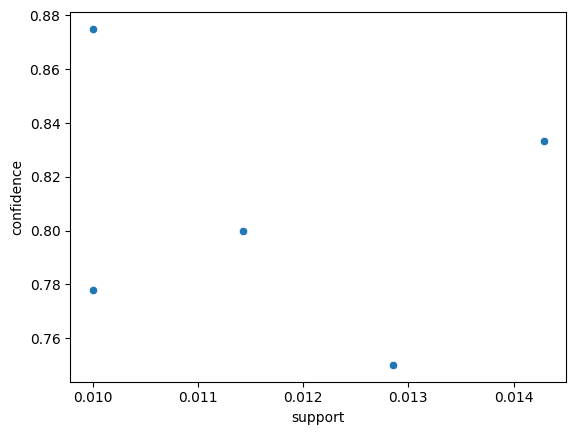

In [51]:
import seaborn as sns
sns.scatterplot(data=rules, x='support', y='confidence')
plt.show()